In [1]:
from ramannoodles import water
from ramannoodles import carbonmonoxide

file already in raman_spectra folder
WATER loaded into the dictionary - shoyu_data_dict.p
file already in raman_spectra folder
CARBON MONOXIDE loaded into the dictionary - shoyu_data_dict.p
file already in raman_spectra folder
CARBON DIOXIDE loaded into the dictionary - shoyu_data_dict.p
file already in raman_spectra folder
FORMIC ACID loaded into the dictionary - shoyu_data_dict.p
file already in raman_spectra folder
2-PROPANOL loaded into the dictionary - shoyu_data_dict.p
file already in raman_spectra folder
ETHYL ALCOHOL loaded into the dictionary - shoyu_data_dict.p
file already in raman_spectra folder
DIMETHYL KETONE loaded into the dictionary - shoyu_data_dict.p


[[Model]]
    (Model(lorentzian, prefix='p1_') + Model(lorentzian, prefix='p2_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 130
    # data points      = 3574
    # variables        = 8
    chi-square         = 2.20981072
    reduced chi-square = 6.1969e-04
    Akaike info crit   = -26390.6199
    Bayesian info crit = -26341.1684
[[Variables]]
    p1_sigma:      26.8784904 (init = 1)
    p1_center:     2109.85482 (init = 2119.855)
    p1_amplitude:  66.7644635 (init = 1)
    p1_fwhm:       53.7569808 == '2.0000000*p1_sigma'
    p1_height:     0.85400000 (init = 0.854)
    p2_sigma:      21.1897865 (init = 1)
    p2_center:     2183.63592 (init = 2176.035)
    p2_amplitude:  52.0596254 (init = 1)
    p2_fwhm:       42.3795730 == '2.0000000*p2_sigma'
    p2_height:     0.85400000 (init = 0.854)



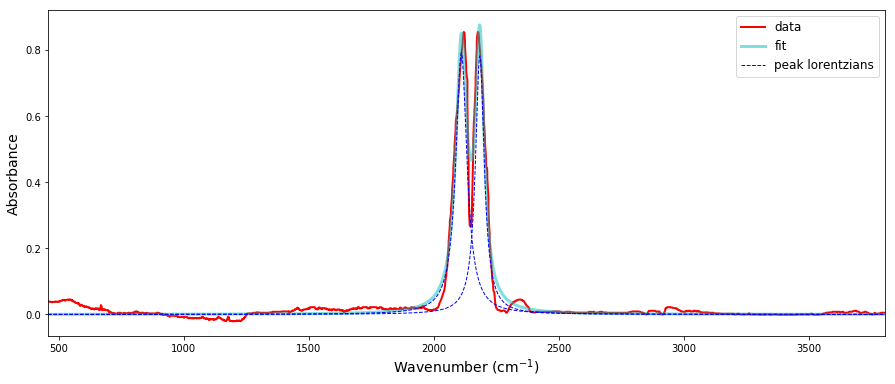

UnboundLocalError: local variable 'mod' referenced before assignment

In [5]:
carbonmonoxide.CarbonMonoxide()
water.water()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import peakutils
import jcamp
from ramannoodles import shoyu
import pickle

In [ ]:
shoyu.initialize_standard_library()
# import data dict
shoyu_data_dict = pickle.load(open('raman_spectra/shoyu_data_dict.p', 'rb'))
sorted(shoyu_data_dict.keys())


In [ ]:
dataCM = shoyu_data_dict['CARBON MONOXIDE']
print(type(dataCM))
indexes = peakutils.indexes(dataCM['y'], thres=0.4/max(dataCM['y']), min_dist=10)
plt.figure(figsize=(15,6))
plt.plot(dataCM['x'], dataCM['y'])
plt.scatter(dataCM['x'][indexes], dataCM['y'][indexes])
# Plots a line between the peak points
plt.plot(dataCM['x'][indexes],dataCM['y'][indexes], marker="o", ms=3 )
plt.title('First estimate')
peak_location =dataCM['x'][indexes]
peak_height = dataCM['y'][indexes]
print(peak_location)
print(peak_height)
# We can enhance the resolution by using interpolation. We will try to fit a Gaussian near each previously detected peak.
peaks_x = peakutils.interpolate(dataCM['x'], dataCM['y'], ind=indexes)
print(peaks_x)
for i in indexes:
    peak_index = dataCM['x'][i]
    plt.axvline(x=peak_index, color='orange')

In [ ]:
import scipy.stats as stats
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from ramannoodles import spectrafit

In [ ]:
# # extract spectra data
# data = shoyu_data_dict['FORMIC ACID']
# x_data = data['x']
# y_data = data['y']
# # subtract baseline
# y_data = spectrafit.subtract_baseline(y_data, deg=3, plot=True, x_data=x_data)
# extract spectra data
def CarbonMonoxide():
    data = shoyu_data_dict['CARBON MONOXIDE']
    x_data = data['x']
    y_data = data['y']
    xmin = data['x'].min()
    xmax = data['x'].max()
    xrange=xmax-xmin
    # # subtract baseline
    # y_data = spectrafit.subtract_baseline(y_data, deg=3, plot=True, x_data=x_data)
    #print(xmin,xmax,xrange)
    # detect peaks
    peaks = spectrafit.find_peaks(x_data, y_data)\
    # assign parameters for least squares fit
    mod, pars = spectrafit.lorentz_params(peaks)
    # fit the model to the data
    out = spectrafit.model_fit(x_data, y_data, mod, pars, report=True)
    # plot fit results
    plot = spectrafit.plot_fit(x_data, y_data, out, plot_components=True)
    # export data in logical structure (see docstring)
    fit_peak_data = spectrafit.export_fit_data(out)
    # print docstring which outlines data structure
    spectrafit.export_fit_data.__doc__
    for i in range(len(fit_peak_data)):
        sigma = fit_peak_data[i][0]  
        center = fit_peak_data[i][1]    
        amplitude = fit_peak_data[i][2] 
    return xmin,xmax,sigma,center,amplitude
CarbonMonoxide()

In [ ]:
# detect peaks
peaks = spectrafit.find_peaks(x_data, y_data)

In [ ]:
# assign parameters for least squares fit
mod, pars = spectrafit.lorentz_params(peaks)

In [ ]:
# fit the model to the data
out = spectrafit.model_fit(x_data, y_data, mod, pars, report=True)

In [ ]:
# plot fit results
spectrafit.plot_fit(x_data, y_data, out, plot_components=True)

In [ ]:
# export data in logical structure (see docstring)
fit_peak_data = spectrafit.export_fit_data(out)
fit_peak_data
print(fit_peak_data)

In [ ]:
# print docstring which outlines data structure
spectrafit.export_fit_data.__doc__

In [ ]:
# print(data['x'][0:3])
# print(data['y'][0:3])

from sklearn import linear_model
from sklearn import preprocessing
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

peak_df = pd.DataFrame(data=fit_peak_data,columns=['sigma','center','amp','fwhm','center'])
print(peak_df)
print(fit_peak_data[1][3]) # As an array
print(peak_df.loc[1][3]) # As a dataframe


def NoodlingML(data):
    "This is a function to scale and split the data into test and training cases"
#     # This is where we begin a train test split of the dataset 
    
#     # This is how we choose our 
    
    
#     # Train and test split data
#     train, test = train_test_split(data, test_size=0.2, random_state=1010)
    
#     # Optional Setting X train and Testing up front
#     X_train, X_test,Y_train, Y_test = train_test_split(data, test_size=0.2, random_state=1010)
    
#     # This is where we say what regression we are 
    
#     # Polynomial regression?
    
#     # Thoughts?
    
#     # Lasso Regression?
    
#     # Thoughts?
    
#     #This is where we have our train and test for Y
#     train_y=train['data columns']
#     train_y=train['data columns']
#     # This is where we have our train and test for X
#     train_y=train['data columns']
#     train_y=train['data columns']
    
#     something_x = train_x
#     somthingelse_x =test_x
#     somenumber = 11
#     # If needed for the experimental data, this is where we rescale the data
#     # By using the preprocessing function from sklearn
#     something_x_scaled = preprocessing.normalize(something_x, 'norm'= somenumber)
#     somethingelse_x_scaled = preprocessing.normalize(somethingelse_x, 'norm'= somenumber)
    
    
#     # This is where we confirm our model of regression
    
#     # This is where we fit our training data
#     model=Lassomodel.fit(train_x,train_y)
    
#     # THis is where we predict our train and test
#     train_predict = model.predict(something_x_scaled)
#     test_predict = model.predict(somethingelse_x_scaled)
    
#     # This is where we want to save our results
    
#     # Probably want to use a pickle dump 
    
#     filename='somecoolfilename.'
#     pickle.dump(model,open(filename,'wb'))
    
    
    return
def test_NoodlingML(data):
    "This is a function to test the scalingsplitting function"
    assert isinstance(data, np.ndarray), 'Input is not a numpy.ndarray'
    # Since we want to make sure that the data remains a dictionary object
    return
def bootstrapping(data):
    "This is a function to run the statistics of the peaks over repeated samples ie bootstrapping"
    # This is where we initialize our variables 
    
    # This is where we repeat samples and get confidence intervals
    
    
    
    
    
    # off by x and thus 70% CI
    
    # off by y and thus 30 % CI for each peak location by and x and y
    
    
    
    # The user has to define the predefined peaks 
    
    # And get the 4+1 pulls from NIst
    return
def test_scalingandsplitting(data):
    "This is a function to test the bootsrapping function"
    assert isinstance(data, np.ndarray), 'Input  is not a numpy.ndarray'
    # Since we want to make sure that the data remains a dictionary object
    return
def PeakSort(data):
    "This function will take the peaks from spectra fit and sort them"
    # Initialize all variables 
    
    # Take all the peaks into an array
    
    # Save index
    
    # Order them by wavenumber 
    
    # This is the center variable 
    
    
    # If loops for user parameters 
    
    # For different decomposition conditions
    
    
    # Given the decomposition structure the peaks will disappear 
    
    # Thus Drop out certain threshold amplitude
    
    # In the dataframe make a new column with a new index
    
    # Get the gap distance 
    
    # Search the gap distance within other given spectra
    
    # Threshold this gap distance 
    return
def test_PeakSort(data):
    "This is a function to test the peak sort function"
    assert isinstance(data, np.ndarray), 'Input  is not a numpy.ndarray'
    # Since we want to make sure that the data remains a dictionary object
    
    # Input is instance of np.array 
    
    # Certain peaks have been dropped out at threshold amplitude 
    
    # Make a new with only the amplitudes
    
    # Array = peaks[i][3[] for I in range(len(inarray))
    
    # Assert minimum of the threshold amplitude values is dropped 

    return
def PeakSaveDescriptors(data):
    "This function will take the sorted peaks and save the descriptors from them"
    # Initialize all variables 
    
    # SAve the descriptors from the sorted peaks 
    
    #Remember that sigma is half of the fwhm 
    
    # 
    return 
def test_PeakSaveDescriptors(data):
    "This function will test the PeakSaveDescriptors function"
    assert isinstance(data, np.ndarray), 'Input  is not a numpy.ndarray'
    # Since we want to make sure that the data remains a dictionary object
    return

def PolyRegression(data):
    "This function will run a polynomial regression"
    return

def test_PolyRegression(data):
    "This function will test the PeakSaveDescriptors function"
    assert isinstance(data, np.ndarray), 'Input  is not a numpy.ndarray'
    # Since we want to make sure that the data remains a dictionary object
    return